In [7]:
import os

# 3rd Party
from PIL import Image

# Paths are we are interested in this notebook
IMAGE_DIRECTORY = 'images'
CORE_LIBRARIES = os.path.join(IMAGE_DIRECTORY, 'tf_serving-libraries.png')
CONTINOUS_TRAINING = os.path.join(IMAGE_DIRECTORY, 'continuous-training.jpeg')
GRPC_REQUESTS = os.path.join(IMAGE_DIRECTORY, 'tf-model-server-grpc.png')

### Use Case
You train a model and you want to use this model to serve predictions

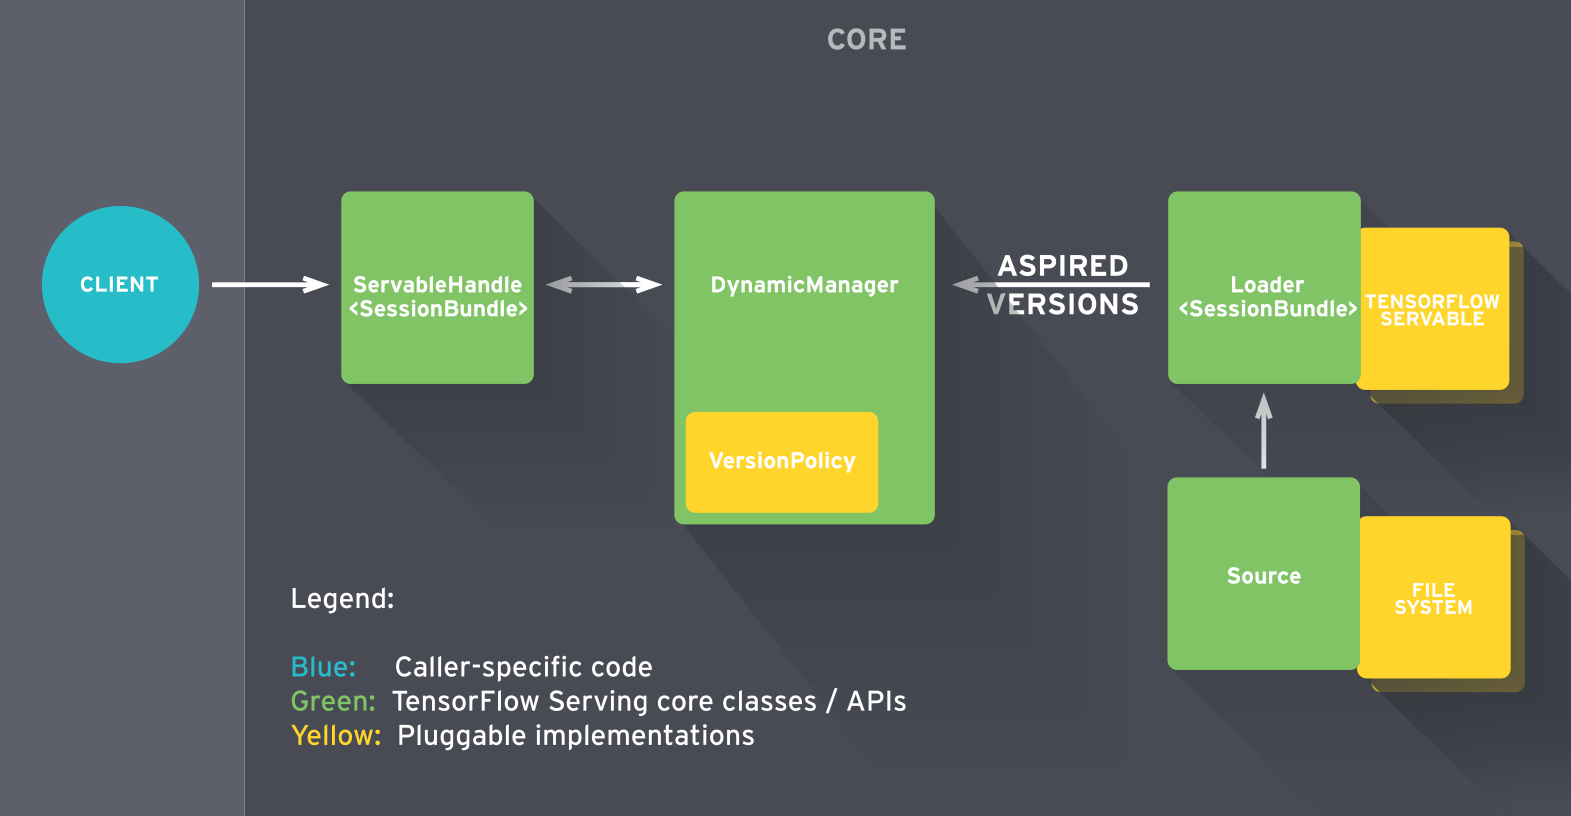

In [3]:
Image.open(CORE_LIBRARIES)

## Source
This component is responsible for recognizing the model files and identify the ones that can be loaded. 
You can consider this portion a watcher on a given directory and will create a loader when a new model comes into the directory that it watches.

## Loader
Model Loader which is responsible how to load it(deserialize the model file) and resources(memory) that the model will require.
Loader knows everything there is to know about the model unlike source. However, it actually does not load the model.

## DynamicManager
After Loader creates the servable, Manager receives the aspired version. 
After manager decides that there is enough resources for model to be loaded, it needs to determine whether this is a new model or an update on the existing model. If it is a new model, it will allow Loader to proceed the load process.
If it is an an update on the existing model, it needs to check with VersionPolicy to find out the policy of the updating the new model.
Eventually, the DynamicManager would handle different versions of models that are being served.

## ServableHandle
ServableHandle is responsible from getting the predictions from served model and communicates this to client. 

### Some Considerations
When it comes to loading a new model and an existing a model, there is always going to be a tradeoff between resource and availability. As we do not want to sacrifice the availability of the service to load a new version of the model. However, if we are going to provide a smooth transition betweeen old and new models, we still want to load these models at the same time and then route traffic gracefully. 
If there is a resource constraint and failing some number of requests is acceptable, one might consider loading the new model and failing the requests that are on flight to old model and time requires for the new model. 

# Continuous Training and Serving

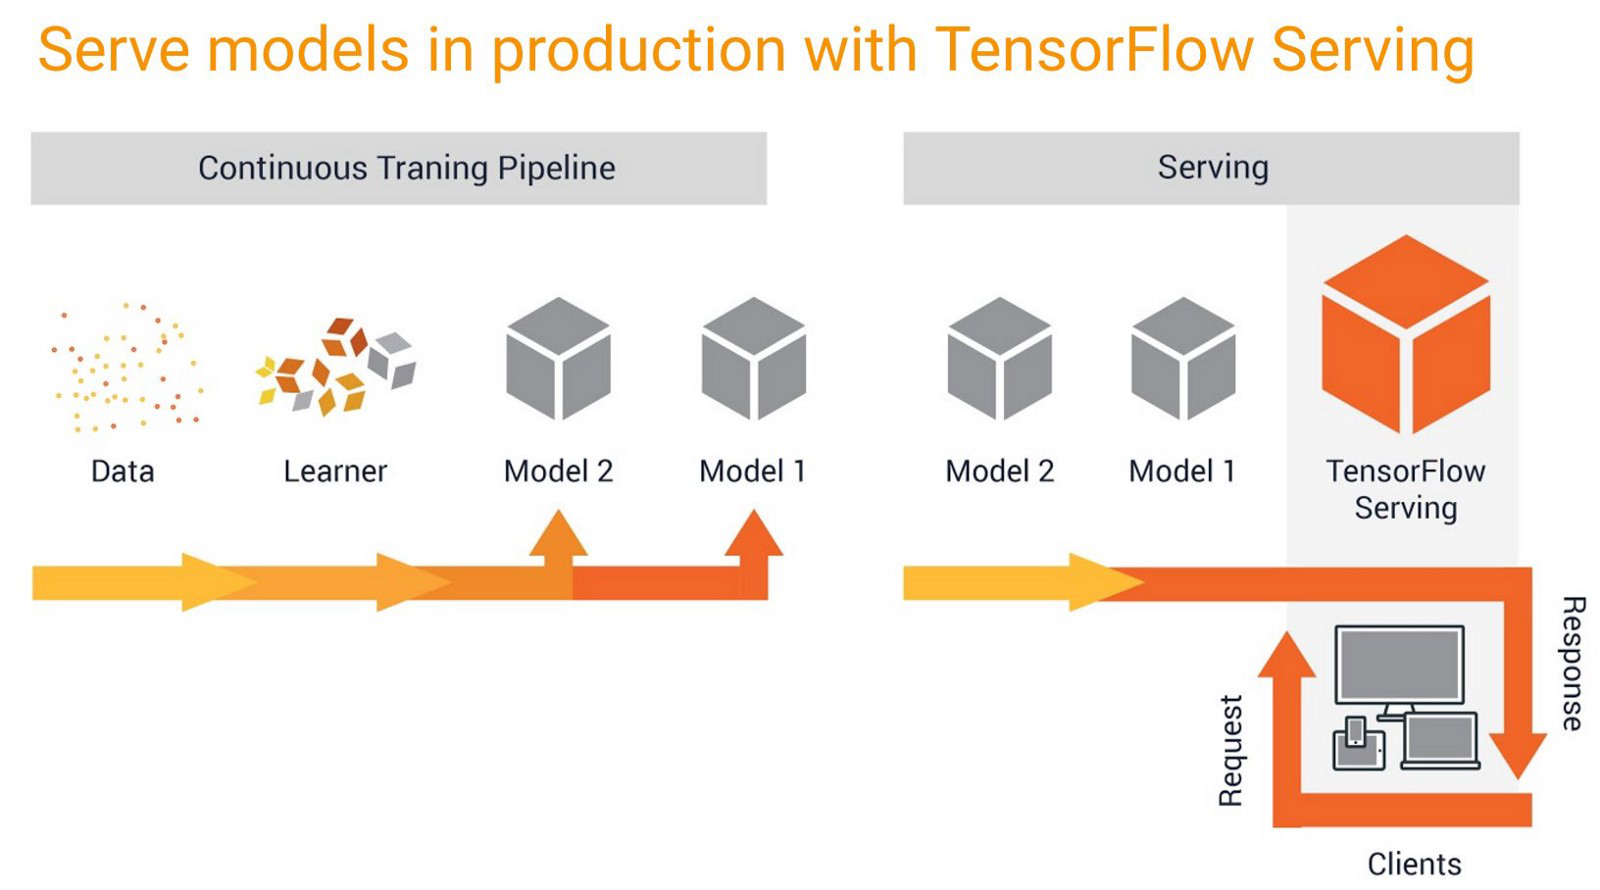

In [5]:
Image.open(CONTINOUS_TRAINING)

### Training Pipeline
This is what we strive for; training pipeline will take care of data input as well as the training of the models along with versions.

### Serving Pipeline
Serving portion will take care of the loading and serving the requrests that are coming through selecting and loading the models that are available. 

> Tensorflow makes it very easy to do serving in a very performant way after we have a trained model. Tensorflow if not shines in the training side, it makes it great option for serving the model on the prediction layer.

## GRPC Request Flow

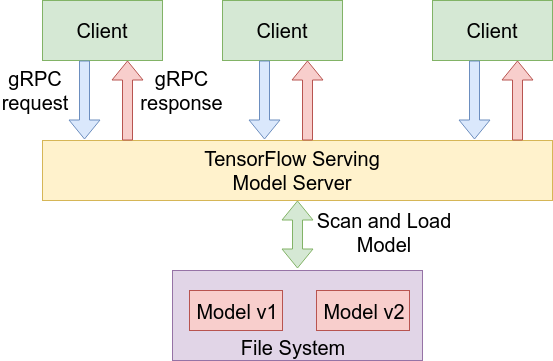

In [8]:
Image.open(GRPC_REQUESTS)

Until Tensorflow Serving 2.0, we had to use GRPC to communicate with the server and communication was being done through Protobufs. This is because Google uses internally such system to communicate between different services.
Starting from TF Serving 2, tensorflow serving supports HTTP/REST API which commmunicates through JSON which makes it even easier to use. 

Today, we are going to see both